In [30]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [33]:
#Include depicted data...
#Case 2 -------------------------- Diameter import
data_Wave= pd.read_csv("../BenzResults/Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
data_TAB= pd.read_csv("../BenzResults/Case_Liu/TAB_Case2.csv", header=None) # TAB_Case2.csv
data_PDPA= pd.read_csv("../BenzResults/Case_Liu/PDPA_Case2.csv", header=None) # PDPA_Case2.csv

#Case 3 -------------------------- Diameter import
TAB_Case3= pd.read_csv("../BenzResults/Case_Liu/TAB_Case3.csv", header=None) # TAB_Case3.csv
KH_Case3= pd.read_csv("../BenzResults/Case_Liu/Wave_Case3.csv", header=None) # SMD_KH_Case3Experiment.csv
PDPA_Case3= pd.read_csv("../BenzResults/Case_Liu/PDPA_Case3.csv", header=None) # PDPA_Case3.csv

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("../BenzResults/Case_Liu/Case_4_Single_D.csv", header=None) # Case_4_Single_D.csv
data_C4_SingleRe= pd.read_csv("../BenzResults/Case_Liu/Case4_Single_Re.csv", header=None) # Case4_Single_Re.csv

#Case 4 -------------------------- ReD import
data_Wave= pd.read_csv("../BenzResults/Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
ReX= pd.read_csv("../BenzResults/Case_Liu/Trajectories/ReX.csv", header=None) 

#Case 2 ------------------------ Trajectory import
TAB_amp00_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_TAB_amp0_0.csv", header=None) # Trajectory_TAB_Case2.csv
Wave_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_wave_Dynamic.csv", header=None) # Trajectory_Wave_Case2.csv
Wave_st_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_Wave_Standard.csv", header=None) # Trajectory_Wave_Case2.csv
Traject_Exp_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_Experiment.csv", header=None) # Trajectory_Experiment_Case2.csv

#Case 4 -------------------------- Trajectory import
TAB_amp02_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_TAB_amp0_2.csv", header=None) # TAB_Traject_Case4.csv
TAB_amp00_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_TAB_amp0_0.csv", header=None) # TAB_sc_Traject_Case4.csv
Wave_st_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Wave_Standard.csv", header=None) # Trajectory_Wave_Case4.csv
Wave_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Wave_Dynamic.csv", header=None) # Trajectory_Wave_Case4.csv
Traject_Exp_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Experiment.csv", header=None) # Trajectory_Experiment_Case4.csv

In [34]:
fdir = "./VTKsolidOn/lagrangian/solidifyingSprayCloud"
#check if directory e
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()

fdir2 = "./VTKsolidOff/lagrangian/solidifyingSprayCloud"
#check if directory e
if not os.path.exists(fdir2):
    print('Error: Path does not exist:', fdir2)
    sys.exit()

In [39]:
# nd = 1
# create reader
reader = vtk.vtkXMLPolyDataReader()
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = []; temp=[]; sigma=[]; density=[]; dyn_viscosity=[];Reynolds=[];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d')))
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0')))    
    temp.append(vtk_to_numpy((data.GetPointData()).GetArray('T')))    
    # sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma')))
    # dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu')))
    # density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho')))
    # Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re')))
    points.append((vtk_to_numpy(data.GetPoints().GetData())))

points2 =[]
point_data2=[]
point_d2 = []
point_d02 = [];
temp2=[];

for fname in sorted(glob.glob(os.path.join(fdir2, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    # print the arrays
    data2 = (reader.GetOutput())
    point_data2.append(data2.GetPointData())
    point_d2.append(vtk_to_numpy((data2.GetPointData()).GetArray('d')))
    point_d02.append(vtk_to_numpy((data2.GetPointData()).GetArray('d0')))  
    temp2.append(vtk_to_numpy((data.GetPointData()).GetArray('T')))    
#     sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma')))
#     dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu')))
#     density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho')))
#     Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re')))
    points2.append((vtk_to_numpy(data2.GetPoints().GetData())))

Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_22666.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_23038.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_23407.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_23779.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_24148.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_24518.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_24892.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_25256.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_25623.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_25991.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_26363.vtp
Reading: ./VTKsolidOn/lagrangian/solidifyin

In [40]:
print(point_d)

[array([0.0005], dtype=float32), array([0.00049999], dtype=float32), array([0.00049999], dtype=float32), array([0.00048926], dtype=float32), array([0.00047128], dtype=float32), array([0.0004571], dtype=float32), array([0.00044647], dtype=float32), array([0.00043724], dtype=float32), array([0.00042934], dtype=float32), array([0.00042254], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float32), array([0.00041912], dtype=float3

In [41]:
d0 =[];
for i in range(0, len(points)):
    d0.append(np.array(point_d0[i]))
d0=np.concatenate(d0,axis=0)

d02 =[];
for i in range(0, len(points2)):
    d02.append(np.array(point_d02[i]))
d02=np.concatenate(d02,axis=0)

In [42]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))

px2=[]
py2=[]
pz2=[]
for i in range(0, len(points2)):
    px2.append(np.array(points2[i][:,0]))
    py2.append(np.array(points2[i][:,1]))
    pz2.append(np.array(points2[i][:,2]))

In [43]:
diameter =[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))   
    diameter = [arr for arr in diameter if arr.size > 0]

diameter2 =[]
Reyn2 =[]
for i in range(0, len(points2)):
    diameter2.append(np.array(point_d2[i]))

In [44]:
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate( px, axis=0 )
py_total = np.concatenate( py, axis=0 )
pz_total = np.concatenate( pz, axis=0 )

c = np.column_stack((py_total, pz_total, diameter_total))
c_sorted = c[np.argsort(c[:, 0])]

diameter_total2 = np.concatenate( diameter2, axis=0 )
px_total2 = np.concatenate( px2, axis=0 )
py_total2 = np.concatenate( py2, axis=0 )
pz_total2 = np.concatenate( pz2, axis=0 )

c2 = np.column_stack((py_total2, pz_total2,diameter_total2))
c_sorted2 = c2[np.argsort(c2[:, 0])]

In [45]:
d2 = pow(c_sorted[:,2],2)
splitedSize = round(len(c_sorted[:,2])/60)

print(len(c_sorted[:,2]))

36


In [46]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)
 
splitedSize = round(len(c_sorted[:,2])/50)
d3_split = [d3[x:x+splitedSize] for x in range(0, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(0, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]

d32 = pow(c_sorted2[:,2],3)
sigma_d32 = sum(d32)
d22 = pow(c_sorted2[:,2],2)
sigma_d22 = sum(d22)

 
splitedSize2 = round(len(c_sorted[:,2])/50)
d3_split2 = [d32[x:x+splitedSize] for x in range(0, len(d32), splitedSize2)]
d2_split2 = [d22[x:x+splitedSize] for x in range(0, len(d22), splitedSize2)]
d_avgsplit2 = [c_sorted2[:,2][x:x+splitedSize] for x in range(0, len(c_sorted2[:,2]), splitedSize2)]
c_shortx2 = [c_sorted2[:,0][x:x+splitedSize] for x in range(0, len(c_sorted2[:,0]), splitedSize2)]
c_shorty2  = [c_sorted2[:,1][x:x+splitedSize] for x in range(0, len(c_sorted2[:,1]), splitedSize2)]


In [47]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))

d322=[];c_avgx2 =[];c_avgy2 =[];d_avg2 =[]

for i in range(0, len(c_shortx2)):
    d322.append(sum(d3_split2[i])/sum(d2_split2[i]))
    c_avgx2.append(sum(c_shortx2[i])/(len(c_shortx2[i])))
    c_avgy2.append(sum(c_shorty2[i])/(len(c_shorty2[i])))
    d_avg2.append(sum(d_avgsplit2[i])/(len(d_avgsplit2[i])))

In [48]:
print(d_avg)

[0.0005000000237487257, 0.0004999929806217551, 0.0004999859957024455, 0.0004892559954896569, 0.0004712759982794523, 0.0004571049939841032, 0.00044646899914368987, 0.0004372429975774139, 0.0004293360107112676, 0.0004225430020596832, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644, 0.00041912199230864644]


(0.045, 0.05505)

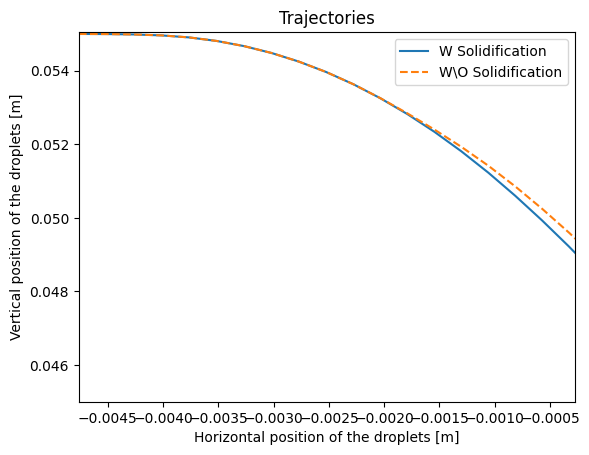

In [60]:
######################################
#####*********Tarjectory*********#####
######################################

#plt.plot(c_sorted[:,0],c_sorted[:,1], label='Simulation')
plt.plot(c_avgx,c_avgy, label='W Solidification')
plt.plot(c_avgx2,c_avgy2, '--',label='W\O Solidification')
#plt.plot(TAB_amp00_Traject_Case4.iloc[:,0], TAB_amp00_Traject_Case4.iloc[:,1], '--',label=' TAB Liu et al.')
#plt.plot(Wave_Traject_Case4.iloc[:,0], Wave_Traject_Case4.iloc[:,1], '--',color='C0',label='Dynamic Wave Liu et al.')
plt
#.plot(Wave_st_Traject_Case4.iloc[:,0], Wave_st_Traject_Case4.iloc[:,1], '+',color='C0',label='Standard Wave Liu et al.')
#plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o',label='Experiment PDPA')
plt.legend()
plt.title('Trajectories')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
# plt.xlim(-0.0047625, 0.00002375)
plt.xlim(-0.0047625, -0.00027625)
plt.ylim(0.045,0.05505)

(-0.0047625, 0.0002375)

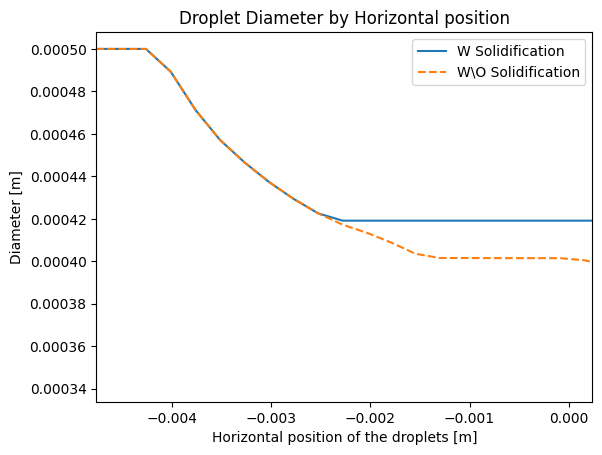

In [56]:
######################################
#####*************SMD************#####
######################################

plt.plot(c_sorted[:,0], c_sorted[:,2], label='W Solidification')
plt.plot(c_sorted2[:,0], c_sorted2[:,2], '--',label='W\O Solidification')
# plt.plot(c_avgx,d_avg, '.', label='D by X_avg by Simulation')
# plt.plot(c_sorted[:,0],c_sorted[:,2],label='KH current work')
# plt.plot(data_C4_SingleD.iloc[:,0]-0.0047625,data_C4_SingleD.iloc[:,1]/1e6, '-', label='Case 4 - Wave Liu et al.')
plt.legend()
plt.title('Droplet Diameter by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Diameter [m]')
plt.xlim(-0.0047625,0.0002375)

(-0.0047625, 0.0002375)

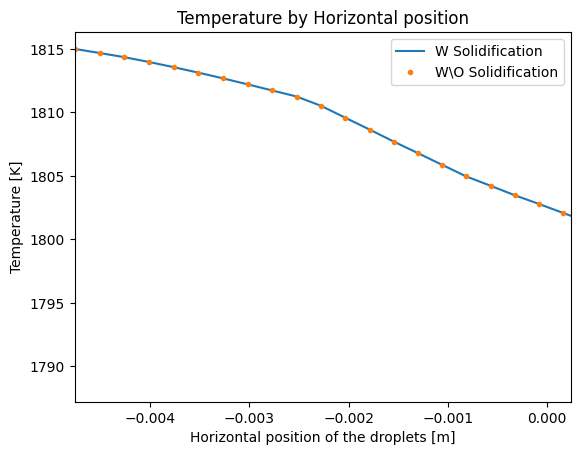

In [61]:
######################################
#####********Temperature*********#####
######################################

Temp = [arr for arr in temp if arr.size > 0]
Temp2 = [arr for arr in temp if arr.size > 0]
plt.plot(c_sorted[:,0], Temp, label='W Solidification')
plt.plot(c_sorted2[:,0], Temp2, '.',label='W\O Solidification')
# plt.plot(ReX.iloc[:,0],ReX.iloc[:,1], '-', label='Case 4 - Wave Liu et al.')
plt.legend()
plt.title('Temperature by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Temperature [K]')
plt.xlim(-0.0047625,0.0002375)

(1800.0, 1816.0)

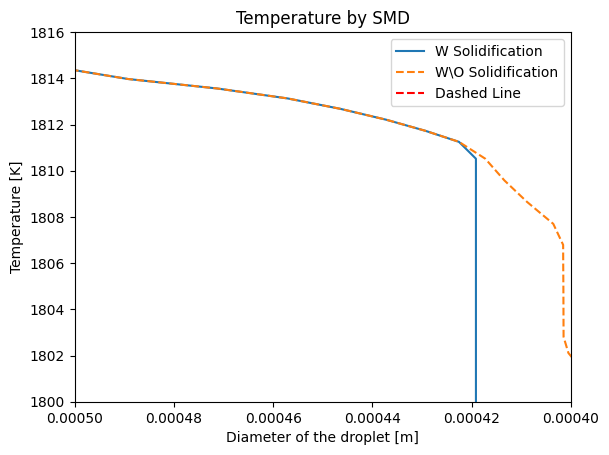

In [59]:
######################################
#####********Temperature*********#####
######################################
Temp = [arr for arr in temp if arr.size > 0]
plt.plot(d_avg, Temp, label='W Solidification')
plt.plot(d_avg2, Temp2, '--',label='W\O Solidification')
plt.axhline(y=1811, color='red', linestyle='dashed', label='Dashed Line')
# plt.plot(ReX.iloc[:,0],ReX.iloc[:,1], '-', label='Case 4 - Wave Liu et al.')
plt.legend()
plt.title('Temperature by SMD')
plt.xlabel('Diameter of the droplet [m]')
plt.ylabel('Temperature [K]')
plt.xlim(0.0005,0.0004)
plt.ylim(1800,1816)